In [32]:
import pymc
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import triangle
%matplotlib inline

In [39]:
#..Set up a model for an (under)damped harmonic oscillator
def dharm_osc(omg,nu,tvec):
    if nu>=2.*omg:
        xvec = 1000.*np.ones_like(tvec)
        return xvec
    else:
        omg1 = (omg**2 - nu**2/4)**(.5)
        xvec = np.exp(-nu*tvec/2)*np.cos(omg1*tvec)
        return xvec

In [ ]:
#..Set up the likelihood function for this

In [29]:
tvec = np.linspace(0.,15.,150)
xvec = dharm_osc(2.,0.6,tvec)

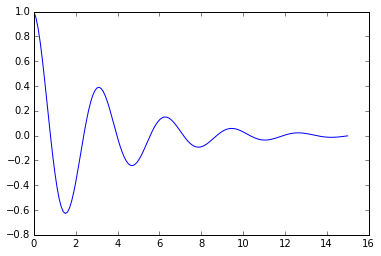

In [30]:
plt.plot(tvec,xvec)

In [102]:
#..Define the variables and priors (bounded uniform)
omg = pymc.Uniform('omg',.5,3)
nu  = pymc.Uniform('nu',.1,5)

tvec =  np.array([2.,5.,10.])
sigma= .15
truth = np.array([2.,.5])
ydata = dharm_osc(truth[0],truth[1],tvec)
print 'ydata = ',ydata
#..
@pymc.deterministic
def y_model(omg=omg, nu=nu, tvec = tvec):
    xvec = dharm_osc(omg,nu,tvec)
    return xvec

#y  = pymc.MvNormalCov('y', y_model, .1*np.eye(3), observed=True, value=ydata)
y  = pymc.Normal('y', mu=y_model, tau=1./sigma**2 , observed=True, value=ydata)

#..
model1 = dict(omg = omg, nu = nu, y_model=y_model, y=y)

ydata =  [-0.41065841 -0.25187131  0.04479332]


In [103]:
S = pymc.MCMC(model1)
S.sample(iter=100000, burn=50000)

 [-----------------100%-----------------] 100000 of 100000 complete in 12.1 sec

(2, 50000)


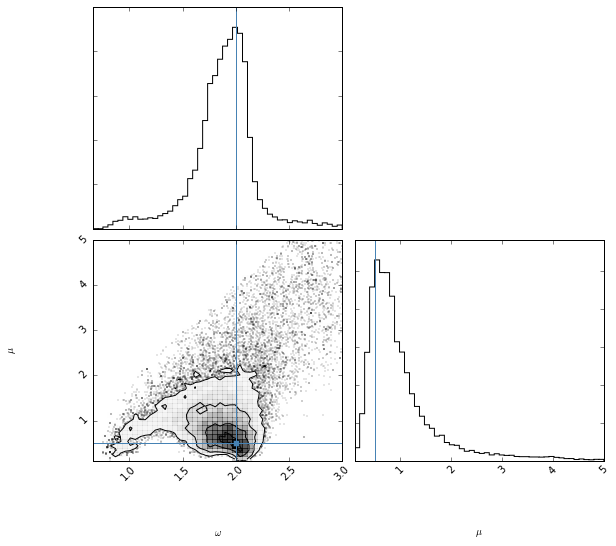

In [119]:
#labels  = ['$\omega$', '$\mu$']
labels  = ['$\omega$', '$\mu$']
samples = np.vstack((S.trace('omg')[:],S.trace('nu')[:]))
print samples.shape

#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(5,5,1)
#plt.plot([0,1],[0,1])
fig = triangle.corner(samples.T,labels=labels,truths=truth,label_kwargs={'fontsize':'24','fontweight':'bold'})
fig.set_size_inches(9,8)

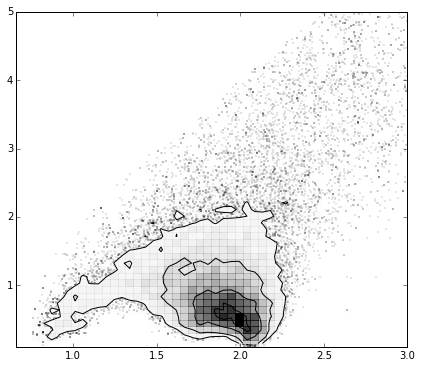

In [118]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
triangle.hist2d(samples[0,:],samples[1,:],)